In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import timedelta
cur_path = "C:\\Users\\ashis\\OneDrive\\Desktop\\Anchored_Vwap_Code\\strangle_premium_feeder\\"

# Function to parse the date string
def parse_date(date_str):
    # Split the string to extract the date part without timezone
    date_part = date_str.split(' GMT')[0]
    # Parse the date using the specified format
    return datetime.strptime(date_part, '%a %b %d %Y %H:%M:%S')


def fetch_data():
    
    df1 = pd.read_csv(cur_path + '7 sept 43500pe.csv', skiprows=2)
    df2 = pd.read_csv(cur_path + '7 sept 45500ce.csv', skiprows=2)

    df1.columns = ["Open", "High", "Low", "Close", "Volume","OpenInterest", "temp"]
    df1.drop(["temp"], axis = 1, inplace = True)
    df1['parsed_date'] = df1.index.to_series().apply(parse_date)
    
    df2.columns = ["Open", "High", "Low", "Close", "Volume","OpenInterest", "temp"]
    df2.drop(["temp"], axis = 1, inplace = True)
    df2['parsed_date'] = df2.index.to_series().apply(parse_date)
    
    return df1, df2


df1 , df2 = fetch_data()

len(df1), len(df2)

(949, 527)

Overlapping data:


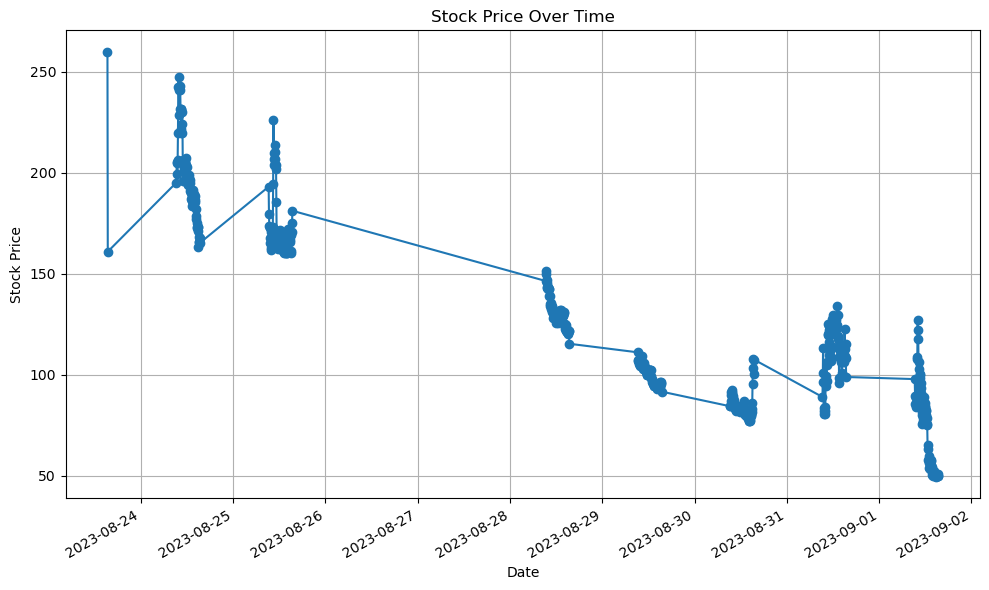

In [25]:
def find_overlap(call_df, put_df):
    overlapping_dates = set(call_df['parsed_date']).intersection(put_df['parsed_date'])
    overlapping_dates = sorted(overlapping_dates)
    if not overlapping_dates:
        print("No overlapping dates found.")
        return
    
    combined_premium = []
    dates = []
    print("Overlapping data:")
    for date in overlapping_dates:
        call_row = call_df[call_df['parsed_date'] == date].squeeze()
        put_row = put_df[put_df['parsed_date'] == date].squeeze()
        combined_premium.append(call_row['Close'] + put_row['Close'] )
        dates.append(date)
#         print(f"Date: {date}")
#         print(f"Call Option Data: {call_row}")
#         print(f"Put Option Data: {put_row}")
#         print()
#     plt.plot(date)
#     plt.plot(combined_premium)
#     plt.show()
#     return dates
    plt.figure(figsize=(10, 6))
    plt.plot(dates, combined_premium, marker='o', linestyle='-')

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Over Time')

    # Format the date axis
    plt.gcf().autofmt_xdate()

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()
find_overlap(df1,df2)



In [22]:
for date in dates:
    print(date)

NameError: name 'dates' is not defined